<h2>Получение геномных интервалов CDS</h2>

In [1]:
import random

random.seed = '2225'
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio import motifs


In [2]:
genomic_table = open('genomic.txt', 'r')

gts = genomic_table.readlines()

gts = gts[8:-1]

gene_table = []

for g in gts:

    gg = ''

    gg = g.split('\t')

    if gg[2] == 'CDS':
        
        gstart = int(gg[3])
        
        gend = int(gg[4])
        
        gchain = gg[6]
        
        gene_table.append([gstart, gend, gchain])

genomic_table.close()
gene_table


[[190, 255, '+'],
 [337, 2799, '+'],
 [2801, 3733, '+'],
 [3734, 5020, '+'],
 [5234, 5530, '+'],
 [5683, 6459, '-'],
 [6529, 7959, '-'],
 [8238, 9191, '+'],
 [9306, 9893, '+'],
 [9928, 10494, '-'],
 [10643, 11356, '-'],
 [10830, 11315, '+'],
 [11382, 11786, '-'],
 [12163, 14079, '+'],
 [14168, 15298, '+'],
 [15445, 16557, '+'],
 [16751, 16960, '-'],
 [16751, 16903, '-'],
 [17489, 18655, '+'],
 [18715, 19620, '+'],
 [19811, 20314, '-'],
 [20233, 20508, '-'],
 [20815, 21078, '-'],
 [21181, 21399, '+'],
 [21407, 22348, '+'],
 [22391, 25207, '+'],
 [25207, 25701, '+'],
 [25826, 26275, '+'],
 [26277, 27227, '+'],
 [27293, 28207, '+'],
 [28374, 29195, '+'],
 [29651, 30799, '+'],
 [30817, 34038, '+'],
 [34300, 34695, '+'],
 [34781, 35371, '-'],
 [35377, 36162, '-'],
 [36271, 37824, '-'],
 [37898, 39115, '-'],
 [39244, 40386, '-'],
 [40417, 41931, '-'],
 [42403, 43173, '+'],
 [43188, 44129, '+'],
 [44180, 45466, '+'],
 [45463, 45750, '+'],
 [45807, 47138, '+'],
 [47246, 47776, '+'],
 [47769, 4

<h2>Получение геномных интервалов в которых ожидается SD</h2>

In [3]:
potential_SD = []

for s in gene_table:

    ggstart = 0

    ggend = 0

    ggchain = s[2]

    if ggchain == '+':

        ggstart = s[0] - 20

        ggend = s[0]

    else:

        ggstart = s[1]

        ggend = s[1] + 20

    potential_SD.append([ggstart, ggend, ggchain])
    
potential_SD

[[170, 190, '+'],
 [317, 337, '+'],
 [2781, 2801, '+'],
 [3714, 3734, '+'],
 [5214, 5234, '+'],
 [6459, 6479, '-'],
 [7959, 7979, '-'],
 [8218, 8238, '+'],
 [9286, 9306, '+'],
 [10494, 10514, '-'],
 [11356, 11376, '-'],
 [10810, 10830, '+'],
 [11786, 11806, '-'],
 [12143, 12163, '+'],
 [14148, 14168, '+'],
 [15425, 15445, '+'],
 [16960, 16980, '-'],
 [16903, 16923, '-'],
 [17469, 17489, '+'],
 [18695, 18715, '+'],
 [20314, 20334, '-'],
 [20508, 20528, '-'],
 [21078, 21098, '-'],
 [21161, 21181, '+'],
 [21387, 21407, '+'],
 [22371, 22391, '+'],
 [25187, 25207, '+'],
 [25806, 25826, '+'],
 [26257, 26277, '+'],
 [27273, 27293, '+'],
 [28354, 28374, '+'],
 [29631, 29651, '+'],
 [30797, 30817, '+'],
 [34280, 34300, '+'],
 [35371, 35391, '-'],
 [36162, 36182, '-'],
 [37824, 37844, '-'],
 [39115, 39135, '-'],
 [40386, 40406, '-'],
 [41931, 41951, '-'],
 [42383, 42403, '+'],
 [43168, 43188, '+'],
 [44160, 44180, '+'],
 [45443, 45463, '+'],
 [45787, 45807, '+'],
 [47226, 47246, '+'],
 [47749, 4

<h2>Получение последовательностей, в которых ожидается SD.</h2>

In [4]:
genomefile = open('genome.txt', 'r')

genomelst = genomefile.readlines()

genomelst = genomelst[1:]

genome = ''.join(genomelst)

genome = genome.split()

genome = ''.join(genome)

test_Sequences = []

for interval in potential_SD:

    seq = Seq(genome[interval[0]-1:interval[1]-1])

    if interval[2] == '-':

        seq = seq.reverse_complement()

       


    test_Sequences.append(str(seq))
 

 


len(test_Sequences)

4337

<h2>Получение выборки для обучения</h2>

In [5]:
raw_Sequences = test_Sequences

In [6]:
SD_consensus ='AGGAGGT'

letters = ['A', 'T', 'G', 'C']

onesub = []

onesub.append(SD_consensus)

for i in range(len(SD_consensus)):

    it = list(SD_consensus)

    it[i] = letters[0]

    onesub.append(''.join(it))

    it[i] = letters[1]

    onesub.append(''.join(it))

    it[i] = letters[2]

    onesub.append(''.join(it))

    it[i] = letters[3]

    onesub.append(''.join(it))

onesub = list(set(onesub))

twosub = []

for sub in onesub:

    for j in range(len(sub)):

        it = list(sub)

        it[j] = letters[0]

        twosub.append(''.join(it))

        it[j] = letters[1]

        twosub.append(''.join(it))

        it[j] = letters[2]

        twosub.append(''.join(it))

        it[j] = letters[3]

        twosub.append(''.join(it))

twosub = list(set(twosub))




        

In [7]:


signal_Sequences = []

for se in raw_Sequences:

    if SD_consensus in se:

        signal_Sequences.append(Seq(SD_consensus))

    elif SD_consensus not in se:
        
        sucount = 0

        for su in onesub:

            if su in se:

                signal_Sequences.append(Seq(su))

                sucount += 1

    if sucount == 0:


        for suu in twosub:

            if suu in se:

                signal_Sequences.append(Seq(suu))


len(signal_Sequences)






2486

<h2>Построение PWM</h2>

In [8]:
out = open('PWM.tsv', 'w')

mot = motifs.create(signal_Sequences)

IC = mot.counts.normalize(pseudocounts=0)

PWM = mot.counts.normalize(pseudocounts={'A':0.495, 'T':0.495, 'G':0.505, 'C':0.505})

PWM = dict(PWM)

print('\t'.join([str(i) for i in range(0,8)]), file=out)

for bukva in PWM:

    PWM[bukva] = np.array(PWM[bukva])

    PWM[bukva] = np.log(PWM[bukva]/(0.25))

    PWM[bukva] = PWM[bukva]/(np.log(2))

    PWM[bukva] = np.around(PWM[bukva], decimals=2)

    print(bukva, end= '\t', file = out)

    for c in PWM[bukva]:

        print(c, end = '\t', file=out)

    print(file=out)
out.close()
PWM


    

{'A': array([ 1.62, -1.25, -1.83,  1.8 , -1.36, -0.42, -0.25]),
 'C': array([-1.75, -2.78, -2.72, -2.97, -2.76, -1.76, -0.89]),
 'G': array([-1.86,  1.64,  1.8 , -2.1 ,  1.67,  1.24, -1.24]),
 'T': array([-1.46, -1.63, -3.57, -2.73, -1.84, -0.76,  1.13])}

In [9]:
IC

{'A': (0.7666934835076428,
  0.10498793242156074,
  0.06999195494770716,
  0.8724859211584876,
  0.09734513274336283,
  0.18624296057924378,
  0.21078037007240547),
 'C': (0.07401448109412712,
  0.036202735317779566,
  0.03781174577634755,
  0.03177795655671762,
  0.03660498793242156,
  0.07361222847948512,
  0.13515687851971037),
 'G': (0.06878519710378117,
  0.7783588093322606,
  0.8712791633145616,
  0.0583266291230893,
  0.7964601769911505,
  0.5921158487530169,
  0.10539018503620273),
 'T': (0.09050683829444892,
  0.08045052292839903,
  0.02091713596138375,
  0.037409493161705554,
  0.06958970233306516,
  0.14802896218825423,
  0.5486725663716814)}

<h2>Вычисление весов материала обучения</h2>

(array([  4.,   1.,   0.,   0.,   8.,  12.,   8.,   4.,  28.,  19.,  32.,
         41.,  46.,  49.,  38.,  55.,  67.,  78., 133.,  63., 108.,  51.,
        107., 116., 101., 176., 111.,  60., 211.,   0., 126.,  35.,  54.,
         97.,  16., 167.,   0.,   0.,  14.,   0.,  98.,  57.,   0.,  41.,
          0.,   0.,   0.,   0.,   0.,  54.]),
 array([ 0.76  ,  0.9628,  1.1656,  1.3684,  1.5712,  1.774 ,  1.9768,
         2.1796,  2.3824,  2.5852,  2.788 ,  2.9908,  3.1936,  3.3964,
         3.5992,  3.802 ,  4.0048,  4.2076,  4.4104,  4.6132,  4.816 ,
         5.0188,  5.2216,  5.4244,  5.6272,  5.83  ,  6.0328,  6.2356,
         6.4384,  6.6412,  6.844 ,  7.0468,  7.2496,  7.4524,  7.6552,
         7.858 ,  8.0608,  8.2636,  8.4664,  8.6692,  8.872 ,  9.0748,
         9.2776,  9.4804,  9.6832,  9.886 , 10.0888, 10.2916, 10.4944,
        10.6972, 10.9   ]),
 <BarContainer object of 50 artists>)

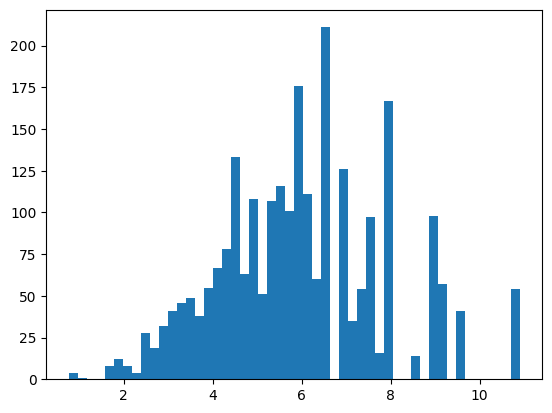

In [10]:
signal_weights = []

for signa in signal_Sequences:

    wei = 0

    for si in range(len(signa)):

        wei += PWM[signa[si]][si]

    signal_weights.append(wei)



plt.hist(signal_weights, 50)



<h2>Вычисление весов материала тестирования</h2>

(array([  2.,   0.,   0.,   1.,   2.,   1.,   2.,   8.,   5.,   7.,   7.,
          7.,  18.,  26.,  31.,  32.,  48.,  40.,  73.,  54.,  89.,  88.,
        152., 124., 114., 170., 206., 147., 175., 197., 215., 294., 300.,
        181., 185., 209., 169., 194., 148.,  59., 137., 182.,   0.,  14.,
         98.,  56.,  41.,   0.,   0.,  29.]),
 array([-6.97  , -6.6126, -6.2552, -5.8978, -5.5404, -5.183 , -4.8256,
        -4.4682, -4.1108, -3.7534, -3.396 , -3.0386, -2.6812, -2.3238,
        -1.9664, -1.609 , -1.2516, -0.8942, -0.5368, -0.1794,  0.178 ,
         0.5354,  0.8928,  1.2502,  1.6076,  1.965 ,  2.3224,  2.6798,
         3.0372,  3.3946,  3.752 ,  4.1094,  4.4668,  4.8242,  5.1816,
         5.539 ,  5.8964,  6.2538,  6.6112,  6.9686,  7.326 ,  7.6834,
         8.0408,  8.3982,  8.7556,  9.113 ,  9.4704,  9.8278, 10.1852,
        10.5426, 10.9   ]),
 <BarContainer object of 50 artists>)

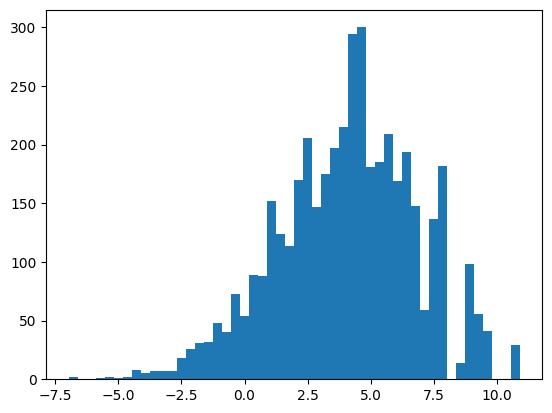

In [11]:
test_weights = []

for test in test_Sequences:

    testlist = []

    for t in range(len(test)-6):

        testlist.append(test[t:t+7])

    tweis = []

    for te in testlist:

        tw = 0

        for tt in range(len(te)):

            tw += PWM[te[tt]][tt]
        
        tweis.append(tw)

    test_weights.append(max(tweis))




plt.hist(test_weights, 50)

<h2>Негативный контроль</h2>

(array([  1.,   1.,  12.,  24.,  26.,  51.,  64.,  80., 108., 110., 115.,
        126., 160., 167., 188., 176., 182., 175., 186., 178., 198., 184.,
        190., 189., 148., 153., 133., 120., 128., 130., 106.,  87.,  72.,
         52.,  65.,  33.,  49.,  53.,  20.,  19.,  16.,  18.,   8.,   7.,
          9.,   3.,   7.,   3.,   5.,   2.]),
 array([-16.7   , -16.2206, -15.7412, -15.2618, -14.7824, -14.303 ,
        -13.8236, -13.3442, -12.8648, -12.3854, -11.906 , -11.4266,
        -10.9472, -10.4678,  -9.9884,  -9.509 ,  -9.0296,  -8.5502,
         -8.0708,  -7.5914,  -7.112 ,  -6.6326,  -6.1532,  -5.6738,
         -5.1944,  -4.715 ,  -4.2356,  -3.7562,  -3.2768,  -2.7974,
         -2.318 ,  -1.8386,  -1.3592,  -0.8798,  -0.4004,   0.079 ,
          0.5584,   1.0378,   1.5172,   1.9966,   2.476 ,   2.9554,
          3.4348,   3.9142,   4.3936,   4.873 ,   5.3524,   5.8318,
          6.3112,   6.7906,   7.27  ]),
 <BarContainer object of 50 artists>)

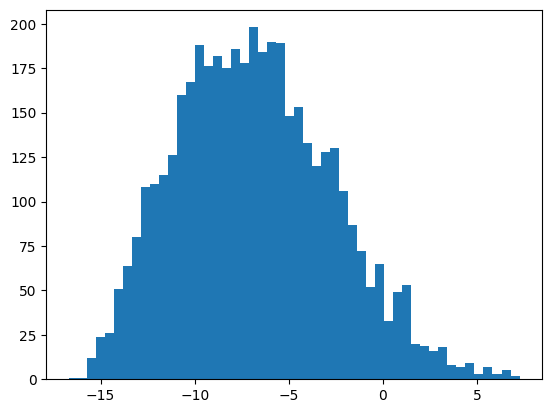

In [12]:
used = [list(range(ter[0], ter[1])) for ter in potential_SD ]

uused = []

for us in used:

    uused += us

didnotused = set(list(range(len(genome)-20))) - set(uused)

didnotused = list(didnotused)

Negative_Seqs = []

for jk in range(4337):

    ran = random.choice(didnotused)

    Negative_Seqs.append(genome[ran:ran+20])

negative_weights = []

for negat in Negative_Seqs:

    negatlist = []

    for n in range(len(negat)-6):

        negatlist.append(negat[t:t+7])

    nweis = []

    for ne in negatlist:

        nw = 0

        for nn in range(len(ne)):

            nw += PWM[ne[nn]][nn]
        
        nweis.append(nw)

    negative_weights.append(max(nweis))




plt.hist(negative_weights, 50)

<h2>Детектирование сигнала</h2>

<h3>Исходное выравнивание</h3>

In [13]:
critical = 0.5

plus = 0

minus = 0

for www in signal_weights:

    if www > critical:

        plus += 1

    else:

        minus += 1

print('+', plus)
print('-', minus)

    

+ 2486
- 0


<h3>Последовательности, предшествующие генам</h3>

In [14]:
critical = 0.5

plus = 0

minus = 0

for wwww in test_weights:

    if wwww > critical:

        plus += 1

    else:

        minus += 1

print('+', plus)
print('-', minus)

    

+ 3893
- 444


<h3>Негативный контроль</h3>

In [15]:
critical = 0.5

plus = 0

minus = 0

for wwwww in negative_weights:

    if wwwww > critical:

        plus += 1

    else:

        minus += 1

print('+', plus)
print('-', minus)

    

+ 221
- 4116


<h2>Матрица информационного содержания</h2>

In [19]:
IC = mot.counts.normalize(pseudocounts=0)
IC = dict(IC)
nIC = []
for letter in ['A', 'T', 'G', 'C']:

    nIC.append(list(IC[letter]))

nIC = np.array(nIC)

lgIC = np.log(nIC)

lgIC = nIC/np.log(2)

IC = nIC*lgIC


np.around(IC, 2)

array([[0.85, 0.02, 0.01, 1.1 , 0.01, 0.05, 0.06],
       [0.01, 0.01, 0.  , 0.  , 0.01, 0.03, 0.43],
       [0.01, 0.87, 1.1 , 0.  , 0.92, 0.51, 0.02],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.03]])

<h2>Logo</h2>

In [17]:
alignment = open('alignment.fasta', 'w')

for seq in signal_Sequences:

    print('>', file=alignment)
    print(seq, file=alignment)

alignment.close()

In [18]:
IC = mot.counts.normalize(pseudocounts=0)